In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.rcParams['font.sans-serif'] = "Arial"
import random
import numpy as np
import math

# Define functions

In [4]:
def distance(x, y):
    '''
    calculates the distance between x and y
    '''
    return math.sqrt(np.sum((x - y)**2))

def mean_distance(cluster):
    '''
    calculates mean distance of all points in a cluster
    
    Args:
        cluster: list of vector np.array's

    Returns: vector np.array
    '''
    return 1/len(cluster)*sum(cluster)

# Find new centroids
def new_centroid(cluster):
    '''
    takes the cluster and returns the update list of centroids
    '''
    for cluster in clusters:
        centroid_list.append(mean_distance(cluster))
    return centroid_list

# Asssign point to cluster

def cluster_assignment(data, centroid_list):
    
    '''
    assigns each point in data to the closest centroid 
    '''
    
    clusters = [[] for _ in range(K)] 
    
    for i in range(len(data)):   

        # Calculate the distance from the point to centroids
        distance_list = []
        for centroid in centroid_list[-K:]:
            distance_list.append(distance(data[i], centroid))

        # Assign the point to the closest centroid
        clusters[distance_list.index(min(distance_list))].append(data[i])

    return clusters

In [5]:
def plot_coordinate(coordinate_list):
    '''
    returns two arrays for eruptions and waiting time from centroid list
    '''
    eruptions = [coordinate[0] for coordinate in coordinate_list]
    waiting = [coordinate[1] for coordinate in coordinate_list]
    
    return eruptions, waiting

def plot_iteration(iteration, clusters, centroid_list):
    '''
    plot the clustering for nth iteration
    '''

    fig, ax = plt.subplots(1, 1)

    for cluster, color, centroid in zip(clusters, colors, centroid_list[-2:]):
        plot_list = plot_coordinate(cluster)

        eruptions = plot_list[0]
        waiting = plot_list[1]
        ax.scatter(eruptions, waiting, color=color)

        plot_centroid = plot_coordinate([centroid])
        ax.scatter(plot_centroid[0], plot_centroid[1], color='black', marker='x', s=100)

    # x-axis
    ax.set_xlabel('Duration of the eruption (in mins)')
    ax.xaxis.set_tick_params(direction='in')

    # y axis
    ax.set_ylabel('Waititing times between eruptions (in mins)')
    ax.yaxis.set_tick_params(direction='in')

    # Title
    ax.set_title('Iteration '+str(iteration))

    sns.despine(ax=ax)

In [6]:
def get_rgb(color):
    """
    normalizes RGB values
    """
    r, g, b = color
    color = (r / 255., g / 255., b / 255.)
    return color

In [7]:
colors = [(214, 39, 40), (23, 190, 207)]
colors = [get_rgb(color) for color in colors]

# Explore data

In [8]:
data = pd.read_csv("faithful.csv")
data = data.drop(data.columns[0], axis=1)

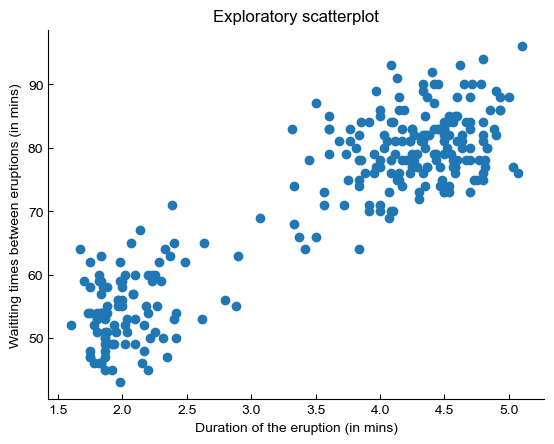

In [9]:
fig, ax = plt.subplots(1, 1)

eruption = data['eruptions']
waiting = data['waiting']

ax.scatter(eruption, waiting)

# x-axis
ax.set_xlabel('Duration of the eruption (in mins)')
ax.xaxis.set_tick_params(direction='in')

# y axis
ax.set_ylabel('Waititing times between eruptions (in mins)')
ax.yaxis.set_tick_params(direction='in')

# Title
ax.set_title('Exploratory scatterplot')

sns.despine(ax=ax)

In [10]:
# initalize list of clusters
K = 2

# Initialization

In [ ]:
# Randomly assign two points as two centroids

# # Centroid 1
# cluster_1 = data[(data['eruptions'] < (max(data['eruptions'])/2)) 
#                  & (data['waiting'] < (max(data['waiting'])/2))]
# centroid_1 = cluster_1.sample()

# # Centroid 2
# cluster_2 = data[(data['eruptions'] > (max(data['eruptions'])/2)) 
#                  & (data['waiting'] > (max(data['waiting'])/2))]
# centroid_2 = cluster_2.sample()

# centroid_1 = centroid_1.to_numpy()[0]
# centroid_2 = centroid_2.to_numpy()[0]
# centroid_list = [centroid_1, centroid_2]

In [11]:
# Initialize at random points
random_list = data.sample(K)
random_list = random_list.to_numpy()
centroid_list = []
for k in range(K):
    centroid_list.append(random_list[k])

In [12]:
# Convert data into array
data = data.to_numpy()

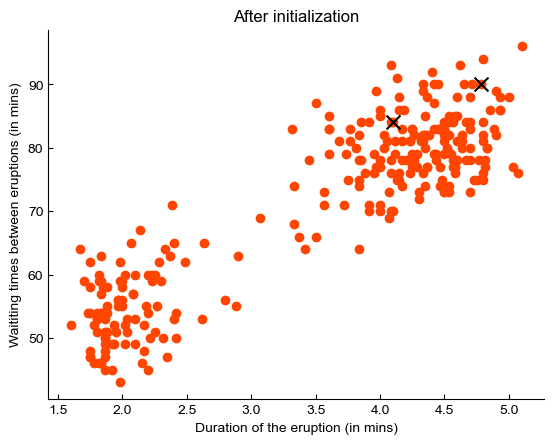

In [13]:
# Plot
fig, ax = plt.subplots(1, 1)

plot_list = plot_coordinate(data)

eruptions = plot_list[0]
waiting = plot_list[1]

ax.scatter(eruptions, waiting, color=get_rgb([255,69,0]))

for centroid in centroid_list:
    plot_centroid = plot_coordinate([centroid])
    ax.scatter(plot_centroid[0], plot_centroid[1], color='black', marker='x', s=100)
    
# x-axis
ax.set_xlabel('Duration of the eruption (in mins)')
ax.xaxis.set_tick_params(direction='in')

# y axis
ax.set_ylabel('Waititing times between eruptions (in mins)')
ax.yaxis.set_tick_params(direction='in')

# Title
ax.set_title('After initialization')

sns.despine(ax=ax)

# Make it work!

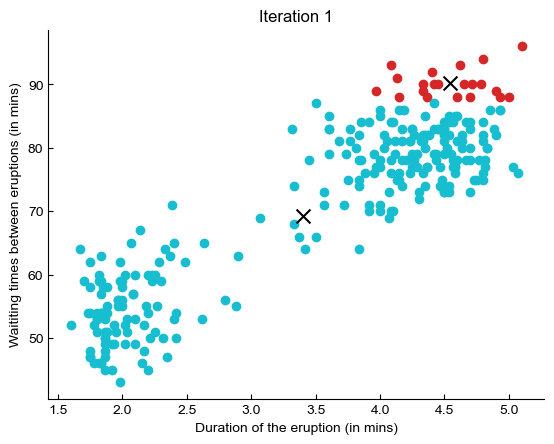

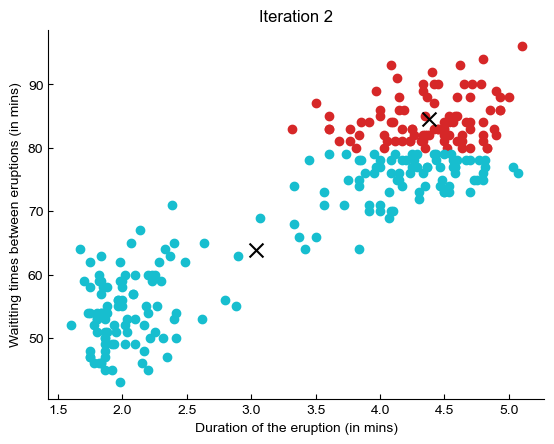

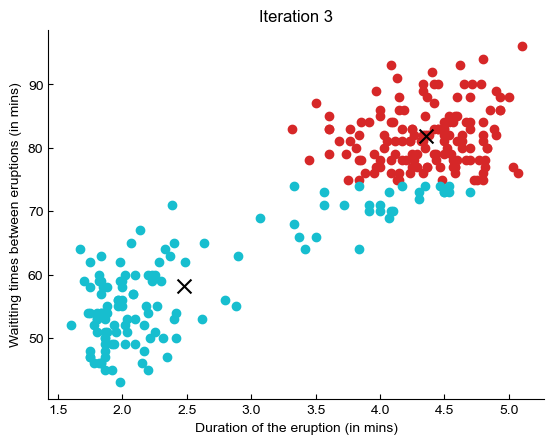

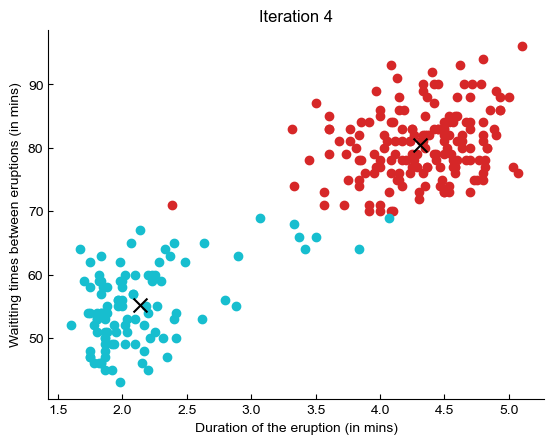

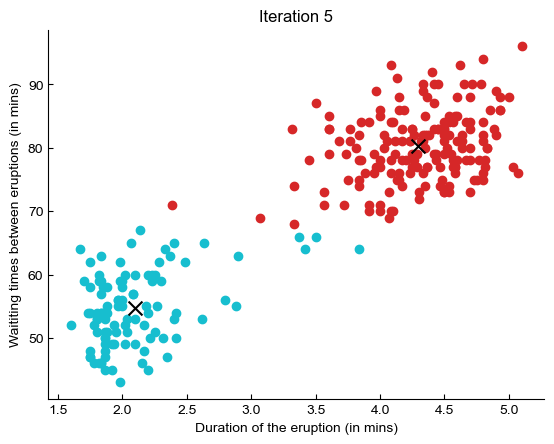

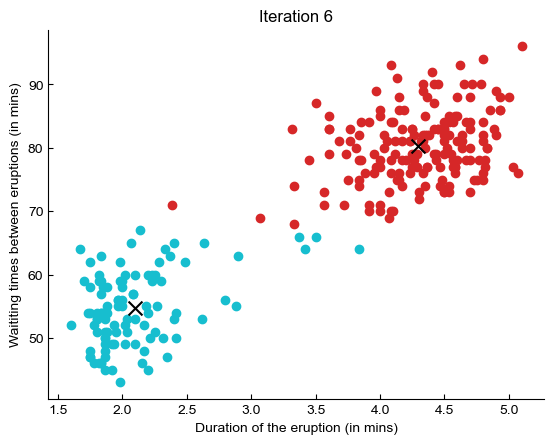

In [14]:
iteration=0

while True:
    iteration += 1
    clusters = cluster_assignment(data, centroid_list)
    centroid_list = new_centroid(clusters)
    plot_iteration(iteration, clusters, centroid_list)
    
    if np.allclose(centroid_list[-4:-2], centroid_list[-2:]):
        break